In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import precision_recall_curve, roc_auc_score, precision_recall_fscore_support
from matplotlib import pyplot as plt
from sklearn.preprocessing import binarize

In [2]:
feature_fns = ['../features2/measure_input.csv',
 '../features2/drug_input.csv',
 '../features2/procedure_input.csv',
 '../features2/observation_input.csv',
 '../features2/condition_input.csv']

feature_dfs = []
for fn in feature_fns:
    feature_dfs.append(pd.read_csv(fn, index_col=0))
feature_df = pd.concat(feature_dfs, axis=1)
feature_df

,2212648_8736,40482801_8862,2212095_8588,2212731_9674,2212731_8583,2212093_8519,2212731_8555,2313816_884,2212648_,2212648_8483,...,cond_44783165,cond_44783376,cond_44783618,cond_45767018,cond_45769438,cond_45769441,cond_45769442,cond_45769443,cond_45773005,death
24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
62,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-130.165823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
126,29.842038,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
145,-118.157962,157.712159,-0.036398,21.437294,3.929099,9.054092,-2.88796,-118.387409,-109.307125,21.834177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
227,0.000000,0.000000,0.000000,0.000000,0.000000,-109.945908,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
249,13.842038,0.000000,0.000000,-4.562706,0.000000,0.000000,0.00000,0.000000,-31.307125,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [3]:
feature_df = feature_df.transpose().drop_duplicates().transpose()

In [4]:
feature_df.columns.tolist().count("death")

1

In [5]:
feature_df

,2212648_8736,40482801_8862,2212095_8588,2212731_9674,2212731_8583,2212093_8519,2212731_8555,2313816_884,2212648_,2212648_8483,...,cond_44783163,cond_44783165,cond_44783376,cond_44783618,cond_45767018,cond_45769438,cond_45769441,cond_45769442,cond_45769443,cond_45773005
24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-130.165823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,29.842038,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145,-118.157962,157.712159,-0.036398,21.437294,3.929099,9.054092,-2.88796,-118.387409,-109.307125,21.834177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,0.000000,0.000000,0.000000,0.000000,0.000000,-109.945908,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
249,13.842038,0.000000,0.000000,-4.562706,0.000000,0.000000,0.00000,0.000000,-31.307125,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def fmax_score(labels, predictions, beta = 1.0, pos_label = 1):
    precision, recall, _ = precision_recall_curve(labels, predictions, pos_label)
    f1 = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
    return np.nanmax(f1)

In [7]:
def individual_feature_LR(data):
    ## read in features and labels
    deaths = np.array(data.death)
    features = data.drop(columns=["death"]).values
    
    kf = KFold(n_splits=10,random_state=2019,shuffle=False)
    kf.get_n_splits(features)
    performance_dfs = []
    
    i = 0
    for train_index, test_index in kf.split(features):
        i += 1
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = deaths[train_index], deaths[test_index]
        
        lr = LR(class_weight={1:0.8,0:0.2})
        lr.fit(X_train,y_train)
        y_pred = lr.predict_proba(X_test)[:,1]
        
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
        
        auc = roc_auc_score(y_test, y_pred)
        fmax = fmax_score(y_test, y_pred)
        
        performance_df = pd.DataFrame({"score":[auc, fmax], "eval_method":["AUC","F-Max"], "fold":[i,i]})
        
        performance_dfs.append(performance_df)
    performance_dfs = pd.concat(performance_dfs)
    return performance_dfs

In [8]:
import seaborn as sns
performance = individual_feature_LR(feature_df)

/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Alex/anaconda2/envs/py3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear

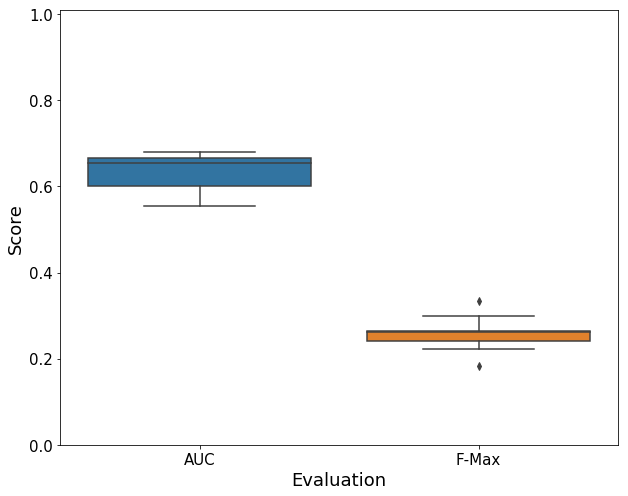

In [11]:
f = plt.figure(figsize=(10,8))
sns.boxplot(data=performance, x="eval_method", y="score")

plt.xlabel("Evaluation", fontsize=18)
plt.ylabel("Score", fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0,1.01)
#plt.legend(loc=2, prop={'size': 16})
# plt.xticks(range(5),["Measure", "Procedure", "Condition","Drug", "Observation"], fontsize=15)

plt.savefig("merged_peformance_180.png", bbox_inches="tight")
plt.show()
plt.close()